In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.stats import t
from scipy.stats import norm

In [2]:
matplotlib.rcParams["font.size"] = 12
matplotlib.rcParams["lines.linewidth"] = 2

In [3]:
cosi = 1/numpy.sqrt(2)
q0=0.2
balim = numpy.sqrt(cosi**2 * (1-q0**2) + q0**2)
print(balim)

0.7211102550927978


In [4]:
comalist = [25532,30149,98934,122260,191275,196592,202666,221178,291879,309306,337817,364410,364929,365429,366393,378842,455486,465951,479267,486394,566771,645151,747077,748600,753474,759003,819754,826543,841705,917608,995924,1050173,1167691,1195008,1203610,1203786,1269260,1274409,1284002,1323268,1352019,1356626,1364394,1379275,1387991]

In [5]:
df = pandas.read_csv('../data/SGA_MaNGAdr17-fits_dphi-20240614.txt',delimiter=" ")

FileNotFoundError: [Errno 2] No such file or directory: '../data/SGA_MaNGAdr17-fits_dphi-20240614.txt'

In [ ]:
df_cut = df[df['BA'] < balim]

In [6]:
df_coma = df[df["SGA_ID"].isin(comalist)]
print(df_coma.shape)

(6, 3)


(array([1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 1.02636427,  1.48209934,  1.93783441,  2.39356949,  2.84930456,
         3.30503963,  3.76077471,  4.21650978,  4.67224485,  5.12797993,
         5.583715  ,  6.03945007,  6.49518515,  6.95092022,  7.40665529,
         7.86239037,  8.31812544,  8.77386051,  9.22959559,  9.68533066,
        10.14106573]),
 <BarContainer object of 20 artists>)

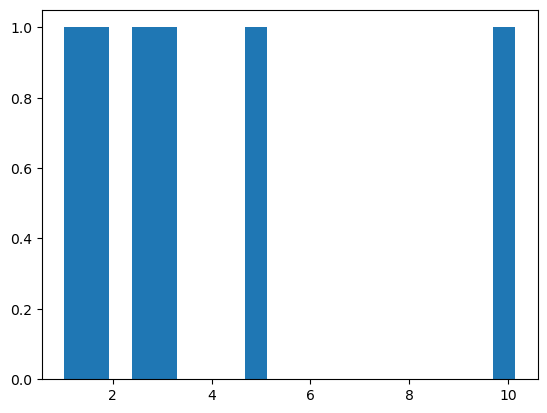

In [7]:
# plt.hist(df['delta_phi'],bins=50,density=True)
plt.hist(df_coma['delta_phi'],bins=20,density=False)
# plt.hist(df_coma['delta_phi'][df_coma['BA']<balim],bins=20,density=False)

# x = numpy.arange(-100,100,1)
# plt.plot(x,cauchy.pdf(x,*fit_c),label='Cauchy')
# plt.plot(x,t.pdf(x,*fit_t),label=r"Student's t: $\nu={:.3f}$".format(fit_t[0]))
# plt.legend()

In [8]:
df_cut[df_cut["delta_phi"] == df_cut["delta_phi"].min()]

,SGA_ID,delta_phi,BA
2194,301137,-89.781324,0.496334


In [9]:
df_cut[df_cut["delta_phi"] == df_cut["delta_phi"].max()]

,SGA_ID,delta_phi,BA
1763,1195897,88.727252,0.247709


In [14]:
df_cut["delta_phi"].max()

88.72725232710485

In [28]:
fit_c = cauchy.fit(df_cut,floc=0)
fit_t = t.fit(df_cut,floc=0)
fit_n = norm.fit(df_cut,floc=0)

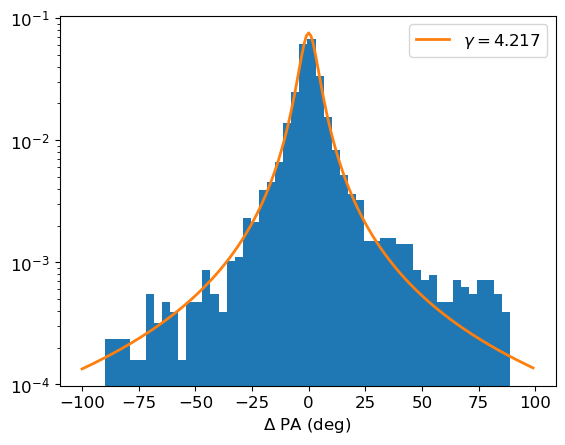

In [47]:
# plt.hist(df['delta_phi'],bins=50,density=True)
plt.hist(df_cut["delta_phi"],bins=50,density=True)
x = numpy.arange(-100,100,1)
plt.plot(x,cauchy.pdf(x,*fit_c),label=r'$\gamma={:.3f}$'.format(fit_c[-1]))
# plt.plot(x,t.pdf(x,*fit_t),label=r"Student's t: $\nu={:.3f}$".format(fit_t[0]))
# plt.plot(x,norm.pdf(x,*fit_n),label=r"Normal: $\sigma={:.3f}$".format(fit_n[0]))
plt.yscale('log')
plt.xlabel(r'$\Delta$ PA (deg)')
plt.legend(prop={'size': 12})
plt.savefig('temp.png')

In [31]:
fit_n

(0, 482389.98501964204)